# Анализ Данных


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#https://data.lacity.org/Public-Safety/Crime-Data-from-2020-to-Present/2nrs-mtv8 - Полное пояснение к колонкам

In [6]:
df = pd.read_csv('/content/laba5_dataset.csv')
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617347 entries, 0 to 617346
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           617347 non-null  int64  
 1   Date Rptd       617347 non-null  object 
 2   DATE OCC        617347 non-null  object 
 3   TIME OCC        617347 non-null  int64  
 4   AREA            617347 non-null  int64  
 5   AREA NAME       617347 non-null  object 
 6   Rpt Dist No     617347 non-null  int64  
 7   Part 1-2        617347 non-null  int64  
 8   Crm Cd          617347 non-null  int64  
 9   Crm Cd Desc     617347 non-null  object 
 10  Mocodes         532038 non-null  object 
 11  Vict Age        617347 non-null  int64  
 12  Vict Sex        535731 non-null  object 
 13  Vict Descent    535726 non-null  object 
 14  Premis Cd       617340 non-null  float64
 15  Premis Desc     617055 non-null  object 
 16  Weapon Used Cd  218021 non-null  float64
 17  Weapon Des

In [18]:
df.groupby('Crm Cd')['Crm Cd Desc'].unique().head(10) #Более низкий номер - более высокая тяжесть преступления

Crm Cd
110                                 [CRIMINAL HOMICIDE]
113                           [MANSLAUGHTER, NEGLIGENT]
121                                    [RAPE, FORCIBLE]
122                                   [RAPE, ATTEMPTED]
210                                           [ROBBERY]
220                                 [ATTEMPTED ROBBERY]
230    [ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT]
231      [ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER]
235       [CHILD ABUSE (PHYSICAL) - AGGRAVATED ASSAULT]
236             [INTIMATE PARTNER - AGGRAVATED ASSAULT]
Name: Crm Cd Desc, dtype: object

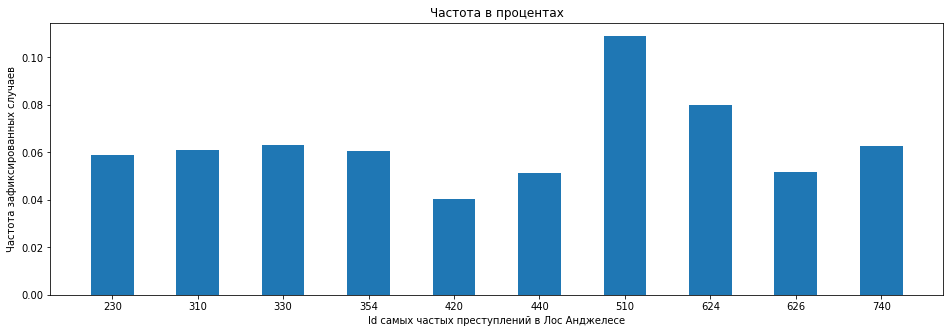

In [9]:
#Предположу, что мелкие кражи являются самым частым преступлением
plt.figure(num = 1 ,figsize = (16, 5))
data = df['Crm Cd'].value_counts(normalize = True)
data = data[:10].to_dict()
data = dict(sorted(data.items()))
id = list(data.keys())
list_string = map(str, id)
id1 = list(list_string)
frequency = list(data.values())
plt.bar(id1, frequency,width = 0.5,align = 'center',alpha = 1)
plt.ylabel('Частота зафиксированных случаев')
plt.xlabel("Id самых частых преступлений в Лос Анджелесе")
plt.title('Частота в процентах')
plt.show()


In [10]:
#Проверим при помощи пандас
df['Crm Cd Desc'].value_counts(normalize = True).head(10)

VEHICLE - STOLEN                                           0.109033
BATTERY - SIMPLE ASSAULT                                   0.079800
BURGLARY FROM VEHICLE                                      0.063075
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)    0.062633
BURGLARY                                                   0.061071
THEFT OF IDENTITY                                          0.060582
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT             0.058745
INTIMATE PARTNER - SIMPLE ASSAULT                          0.051567
THEFT PLAIN - PETTY ($950 & UNDER)                         0.051485
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)            0.040451
Name: Crm Cd Desc, dtype: float64

Судя по графику можно заявить, что большая часть преступлений происходит в восточной части Лос Анжелеса

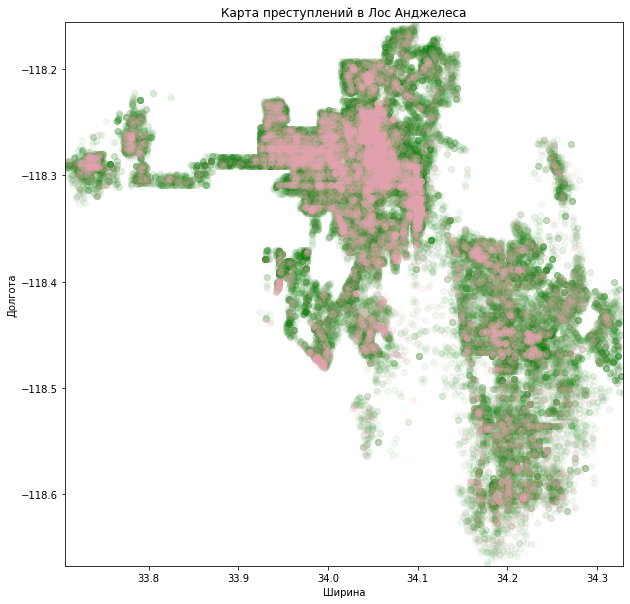

In [11]:
x = df.groupby('Crm Cd')['LAT'].get_group(510).tolist()
c = df.groupby('Crm Cd')['LAT'].get_group(624).tolist()
while 0 in x and c:
  x.remove(0)
  c.remove(0)
y = df.groupby('Crm Cd')['LON'].get_group(510).tolist()
b = df.groupby('Crm Cd')['LON'].get_group(624).tolist()
while 0 in y and b:
  y.remove(0)
  b.remove(0)
plt.figure(num = 1 ,figsize = (10, 10))
plt.scatter(x,y,alpha = 0.05, color = 'Green')
plt.scatter(c,b,alpha = 0.03, color = 'pink')
plt.xlim(min(x),max(x))
plt.ylim(min(y),max(y))
plt.ylabel("Долгота")
plt.xlabel("Ширина")
plt.title("Карта преступлений в Лос Анджелеса")
plt.show()

Предположим, что до женщин чаще домогаются 

In [12]:
df.groupby('Crm Cd')['Vict Sex'].value_counts()[121]

Vict Sex
F    2443
M      20
Name: Vict Sex, dtype: int64

Предположим, что люди пожилого возраста чаще становятся жертвами преступлениями

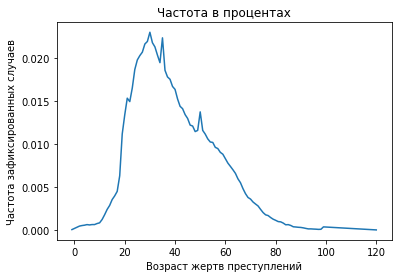

In [13]:
clear_data = df['Vict Age'].value_counts(normalize = True).to_dict()
del clear_data[0]
clear_data = dict(sorted(clear_data.items()))
id = list(clear_data.keys())
frequency = list(clear_data.values())
plt.plot(id, frequency)
plt.ylabel('Частота зафиксированных случаев')
plt.xlabel("Возраст жертв преступлений")
plt.title('Частота в процентах')
plt.show()

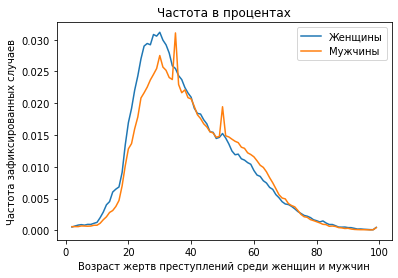

In [14]:
clear_data_f = df.groupby('Vict Sex')['Vict Age'].value_counts(normalize = True)['F'].to_dict()
clear_data_m = df.groupby('Vict Sex')['Vict Age'].value_counts(normalize = True)['M'].to_dict()
del clear_data_f[0]
del clear_data_f[-1]
del clear_data_m[0]
del clear_data_m[-1]
clear_data_f, clear_data_m = dict(sorted(clear_data_f.items())), dict(sorted(clear_data_m.items()))
id_f, id_m = list(clear_data_f.keys()), list(clear_data_m.keys())
frequency_f, frequency_m  = list(clear_data_f.values()), list(clear_data_m.values())
plt.plot(id_f, frequency_f, label = "Женщины")
plt.plot(id_m, frequency_m, label = "Мужчины")
plt.ylabel('Частота зафиксированных случаев')
plt.xlabel("Возраст жертв преступлений среди женщин и мужчин")
plt.title('Частота в процентах')
plt.legend()

Из полученных графиков можно сделать вывод, что жертвами преступлений становятся преимущественно становятся люди среднего возраста. Женщины чуть чаще становятся жертавми в раннем возрасте, когда мужчины в среднем

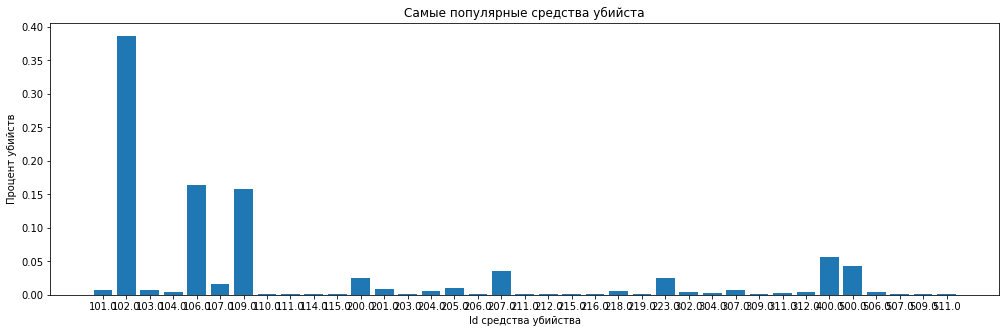

In [15]:
plt.figure(num = 1 ,figsize = (17, 5))
data = df.groupby('Crm Cd')["Weapon Used Cd"].value_counts(normalize = True)[110].to_dict()
data = dict(sorted(data.items()))
id = list(data.keys())
list_string = map(str, id)
id1 = list(list_string)
frequency = list(data.values())
plt.bar(id1, frequency, alpha = 1)
plt.title("Самые популярные средства убийста")
plt.ylabel("Процент убийств")
plt.xlabel("Id средства убийства")
plt.show()


In [16]:
df['Weapon Desc'].value_counts(normalize = True).head(10)

STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)    0.536201
UNKNOWN WEAPON/OTHER WEAPON                       0.102903
VERBAL THREAT                                     0.072488
HAND GUN                                          0.062063
SEMI-AUTOMATIC PISTOL                             0.023154
KNIFE WITH BLADE 6INCHES OR LESS                  0.020879
UNKNOWN FIREARM                                   0.020837
OTHER KNIFE                                       0.017957
MACE/PEPPER SPRAY                                 0.011164
VEHICLE                                           0.010118
Name: Weapon Desc, dtype: float64

Как мы видим, чаще всего убийства связаны с приминением физической силы, нежели огнестрельным